## Introduction
This notebook is intended to give those who does not familiar with statistics a brief introdiction of this topic.<br>
In this notebook, I'll cover some basic statistic concepts that are commonly used when doing data preprocessing.<br>
I'm new to this category, so if I made anything wrong, feel free to tell me. :)<br>
These are what I'm going to introduce:
- Getting started
    - Let's review some basic concepts of statistics! Including:
        - Mean, Median, Mode
        - Variance, Standard deviation
        - Skewness, Kurtosis
        - Interquartile range
        - Normal distribution
- Normalization
    - What is normalization and how to do apply it?
- Feature scaling
    - Introduce several feature scaling methods in sklearn.
        - MinMaxScaler
        - StandardScaler
        - RobustScaler
        - Normalizer
- Correlation
    - Why we don't like correlated variables?
- skew data
    - In this section, we'll introduce what skew data is and how to handle skew data. We'll cover:
        - right skewness
        - left skewness
- Conclusion
- Reference
    - Some great reference that I learned a lot from.

---

## Getting started
As a warm up, we'll review some commonly seen words in statistics.<br>
Before we go any further, let's import some libraries that we'll use later.

In [244]:
%matplotlib inline
import numpy as np
from scipy.stats import mode, norm, skew, kurtosis
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set(color_codes=True, palette="deep")

### Mean, Median, Mode
- Mean is the the average value of all the data.
    - Becareful that mean is sensitive to outliers.
- Median is the middle value of all sorted data.
    - Median is robust to outliers and it can represent the central value of a distribution.
- Mode is the value that occurs the most of all the data.

Mean: 9.4507
Median: 9.0
Mode: ModeResult(mode=array([0]), count=array([538]))


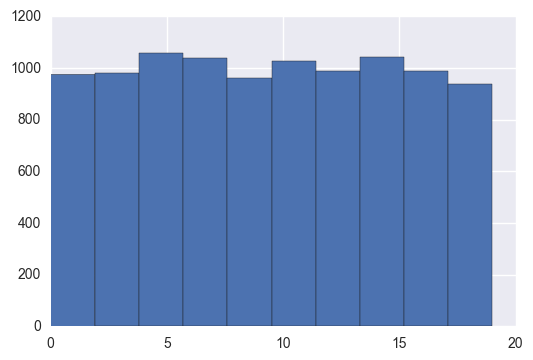

In [245]:
N = 10000
samples = np.random.randint(low=20, size=N)
print("Mean:", np.mean(samples))
print("Median:", np.median(samples))
print("Mode:", mode(samples))
_ = plt.hist(samples)

### Variance & Standard deviation
- Variance calculates how spread the data is.<br>
- Standard deviation is the square root of variance.

Variance: 1.00009537764
Square root of var: 1.00004768768
Standard deviation: 1.00004768768


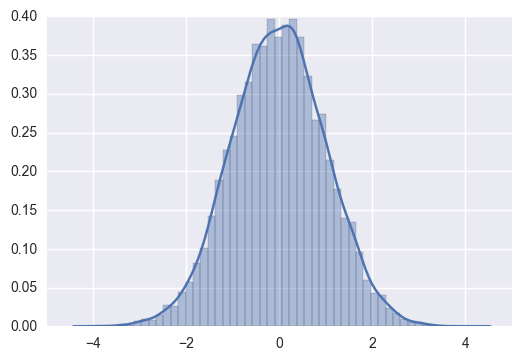

In [246]:
N = 10000
samples = np.random.randn(N)
print("Variance:", np.var(samples))
print("Square root of var:", np.sqrt(np.var(samples)))
print("Standard deviation:", np.std(samples))
sns.distplot(samples)

### Skewness & Kurtosis
Skewness measures how asymmetry the data is.<br>
Kurtosis measures how think the tail is and how sharp the peak is.<br>
In normal distribution, the skewness and kurtosis are nearly equal to 0.
For testing skewness, we often set a threshold to do that.<br>
For instance, we set the variables that have skewness > 0.75 are called right skewness and thus do log tranformation.<br>
We'll see how to deal with skewness later.

In [247]:
# skewness, kurtosis
print("Skewness:", skew(samples))
print("kurtosis:", kurtosis(samples))

Skewness: -0.003381897020416523
kurtosis: -0.030290593043530212


### Interquartile range
Interquartile range divids data into four quartiles, Q1, Q2 and Q3.<br>
Q1 is the value on the 25%, Q2 is equals to mean, and so on.<br>
IQR = Q3 - Q1, and is used to measure outliers.<br>
Data that are greater or smaller than 1.5 IQR is called outliers.

In [248]:
def cal_quartile(data, N):
    data = np.sort(data)
    num = int((len(data)/4)*N)
    return data[num]
def cal_outliers(data):
    outliers = 1.5*(cal_quartile(data, 3) - cal_quartile(data, 1))
    left_condition = data < -outliers
    right_condition = data > outliers
    return data[left_condition | right_condition]

Q1: -0.662618270456
Q2: 0.0149633331588
Q3: 0.70178229293
Number of outliers: 421


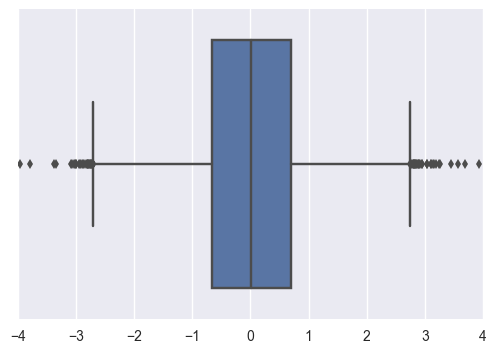

In [249]:
N = 10000
samples = np.random.randn(N)
sns.boxplot(samples)
print("Q1:", cal_quartile(samples, 1))
print("Q2:", cal_quartile(samples, 2))
print("Q3:", cal_quartile(samples, 3))
print("Number of outliers:", len(cal_outliers(samples)))

### Normal distribution
In many machine learning tasks, we hope that the data is normal-distribution like.<br>
Normal distribution data can help the models learn better.<br>
#### What is normal distribution data?
A set of normal distributed data has several features:
- Belled-shape
- Mode is equal to median.
- 68-95-99.7 rule
    - 68% of the data is within mean +/- 1 std.
    - 95% of the data is within mean +/- 2 std.
    - 99.7% of the data is within mean +/- 3 std.
Standard normal distribution is normal distribution with its mean=0 and std=1.

In [250]:
N = 10000
samples = np.random.normal(10, 100, N)

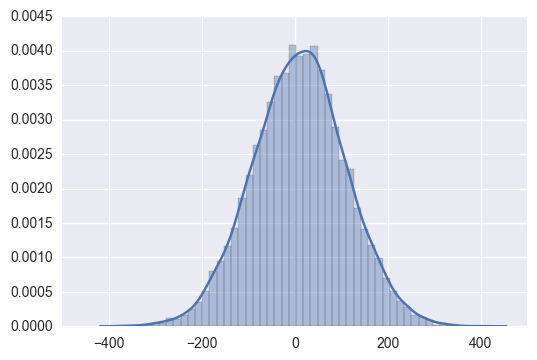

In [251]:
sns.distplot(samples)
# plt.figure(figsize=(6, 4))
# mu, sigma = norm.fit(samples)
# n, bins, patches = plt.hist(samples, normed=1, bins=100)
# y = mlab.normpdf(bins, mu, sigma)
# l = plt.plot(bins, y, 'r-', linewidth=2)
# plt.title("Normal distribution")

Let's test the 68-95-99.7 rule using mean and std!

In [252]:
def cal_portion(data, num_std):
    mean = np.mean(data)
    std = np.std(data)
    left_condition = data >= (mean - num_std*std)
    right_condition = data <= (mean + num_std*std)
    return (len(data[(left_condition & right_condition)]) / len(data)) * 100

In [253]:
print("mean+/-1 std:", cal_portion(samples, 1))
print("mean+/-2 std:", cal_portion(samples, 2))
print("mean+/-3 std:", cal_portion(samples, 3))

mean+/-1 std: 68.42
mean+/-2 std: 95.5
mean+/-3 std: 99.66000000000001


Looks like the normal distribution that we created really follows the rule!

---

## Normalization
When we want to compare variables in different units, it is hard for us to measure the difference level.<br>
However, with normalization, we eliminate units and thus can do some calculation on those variables.<br>
In machine learning tasks, numerical features usually consist of different units.<br>
For those features which have larger number, they will get relatively small weights compare to those which have smaller number. <br>
To train a better and more rebust model, we normally have to do normalization on our data.<br>
As a reminder: Normalization won't change the distribution of data, so don't worry about it:).

In [254]:
# generating samples from normal distribution
N = 10000
mean = 10
std = 50
samples = np.random.normal(mean, std, N)

Let's see how data looks like before doing normalization.

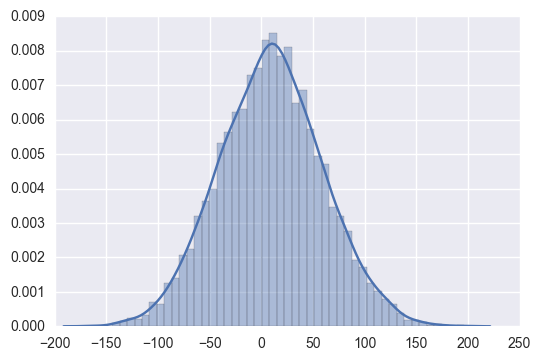

In [255]:
sns.distplot(samples)

To do normalization, we first have to calculate the distribution's mean and std.

In [256]:
mean = np.mean(samples)
std = np.std(samples)
print("mean:", mean)
print("std:", std)

mean: 9.59992176021
std: 49.9930578584


Then, we minus the mean and divid by the std of the data.

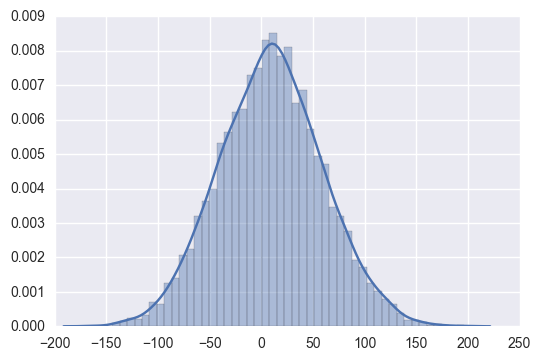

In [257]:
nomalized_samples = (samples - mean)/std
sns.distplot(samples)

---

## Feature scaling
From the sklearn preprocessing library, we import MinMaxScaler, StandardScaler, RobustScaler and Normalizer.
These four functions are really useful in data pre-processing stage.
- StandardScalar
    - Standarlize the data by: (x - mean(x)) / std(x)
    - StandardScalar assumes that the dataset is normal distributed. So if you're dataset is skewed, you may want to handle skewness first.(We'll talked about how to handle skewed data later.)
- MinMaxScalar
    - MinMaxScalar scales the data to (0, 1) range by: (x - min(x)) / (max(x) - min(x))
    - Pretty useful in, for example, image processing or handling non-normal distributed data.
    - However, MinMaxScalar is sensitive to outliers. So if your model is also sensitive to outliers, use RobustScalar instead.
- RobustScaler
    - (x - Q1(x)) / (Q3(x) - Q1(x))
    - RobustScaler use quartiles instead of using minimum and maximum value. And because of this, RobustScaler is robust to outliers.
    - Some models are sensitive to outliers. For instance,linear models like Lasso (L1 regularization), Ridge (L2 regularization). In these cases, use RobustScaler instead.
- Normalizer

In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
iris = datasets.load_iris()
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(iris.data, columns=columns)
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [105]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


By plotting the variables using kdeplot, we can clearly see their distribution.
- For sepal_length and sepal_width, we use StandardScaler since they look like normal distribution.
- As for petal_length and petal_width, they look like bimodal distribution. We use MinMaxScaler instead.

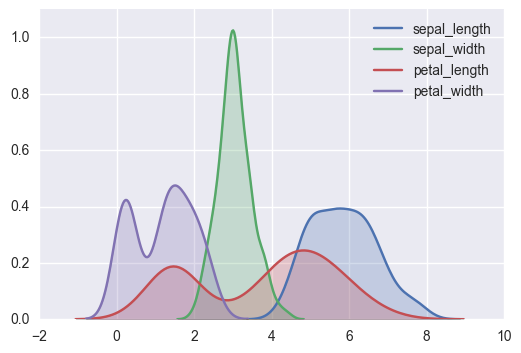

In [238]:
plt.ylim(0, 1.1)
sns.kdeplot(df["sepal_length"], shade=True)
sns.kdeplot(df["sepal_width"], shade=True)
sns.kdeplot(df["petal_length"], shade=True)
sns.kdeplot(df["petal_width"], shade=True)

In [287]:
def plot_kde(df, col1, col2, scaler, title, ymax=1):
    print("Before transformation")
    print(col1, ": mean:", np.mean(df[col1]),"std:", np.std(df[col1]))
    print(col2, ": mean:", np.mean(df[col2]),"std:", np.std(df[col2]))
    transformed_df = scaler.fit_transform(df)
    transformed_df = pd.DataFrame(transformed_df, columns=df.columns)
    print("After transformation")
    print(col1, ": mean:", np.mean(transformed_df[col1]),"std:", np.std(transformed_df[col1]))
    print(col2, ": mean:", np.mean(transformed_df[col2]),"std:", np.std(transformed_df[col2]))
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].set_xlabel("unit (cm)")
    ax[0].set_ylim(0, ymax)
    ax[0].set_title("Origin data")
    sns.kdeplot(df[col1], ax=ax[0], shade=True)
    sns.kdeplot(df[col2], ax=ax[0], shade=True)
    ax[1].set_xlabel("unit (cm)")
    ax[1].set_ylim(0, ymax)
    ax[1].set_title(title)
    sns.kdeplot(transformed_df[col1], ax=ax[1], shade=True)
    sns.kdeplot(transformed_df[col2], ax=ax[1], shade=True)
    plt.show()

Before transformation
sepal_length : mean: 5.843333333333335 std: 0.8253012917851409
sepal_width : mean: 3.0540000000000007 std: 0.4321465800705435
After transformation
sepal_length : mean: -1.6903145549918008e-15 std: 0.9999999999999998
sepal_width : mean: -1.6370238498097932e-15 std: 1.0


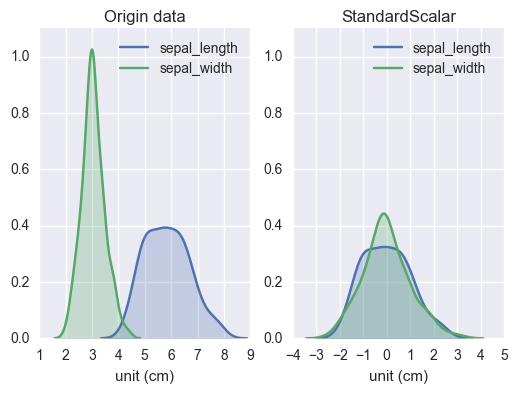

In [288]:
plot_kde(df, "sepal_length", "sepal_width", StandardScaler(), "StandardScalar", ymax=1.1)

Before transformation
petal_length : mean: 3.7586666666666693 std: 1.7585291834055201
petal_width : mean: 1.1986666666666672 std: 0.760612618588172
After transformation
petal_length : mean: 0.4675706214689266 std: 0.298055793797546
petal_width : mean: 0.4577777777777779 std: 0.31692192441173805


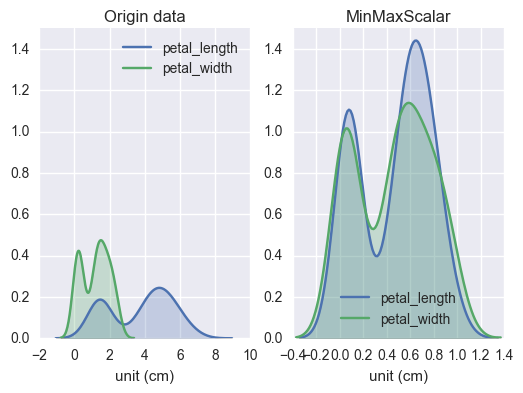

In [289]:
plot_kde(df, "petal_length", "petal_width", MinMaxScaler(), "MinMaxScalar", ymax=1.5)

Since in the iris dataset, there seems be no outliers.<br>
So we're going to generate fake data by adding outliers.

In [290]:
print("(min, max) of petal_length:", min(df["petal_length"]), max(df["petal_length"]))
print("(min, max) of petal_width:", min(df["petal_width"]), max(df["petal_width"]))

(min, max) of petal_length: 1.0 6.9
(min, max) of petal_width: 0.1 2.5


We add two fake data with outliers of petal_length and petal_width here.

In [291]:
df2 = pd.DataFrame([[4.2, 2.0, 10.5, 0.01], [4.2, 2.0, 13, 0.001]], columns=df.columns)
df2 = df.append(df2)

Before transformation
petal_length : mean: 3.863815789473687 std: 1.975226480755311
petal_width : mean: 1.1829671052631585 std: 0.7677273486158175
After transformation
petal_length : mean: 0.23865131578947363 std: 0.16460220672960918
petal_width : mean: 0.47297603251827036 std: 0.30721382497631755


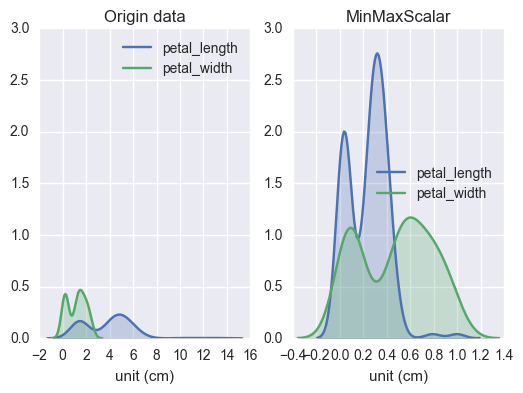

In [292]:
plot_kde(df2, "petal_length", "petal_width", MinMaxScaler(), "MinMaxScalar", ymax=3)

Wow, you see that?<br>
Only with two outliers, the result of scaling using MinMaxScaler can be pretty bad!<br>
Let's see if RobustScaler can fix this problem or not.

Before transformation
petal_length : mean: 3.863815789473687 std: 1.975226480755311
petal_width : mean: 1.1829671052631585 std: 0.7677273486158175
After transformation
petal_length : mean: -0.15319548872180436 std: 0.5643504230729456
petal_width : mean: -0.07802192982456167 std: 0.5118182324105454


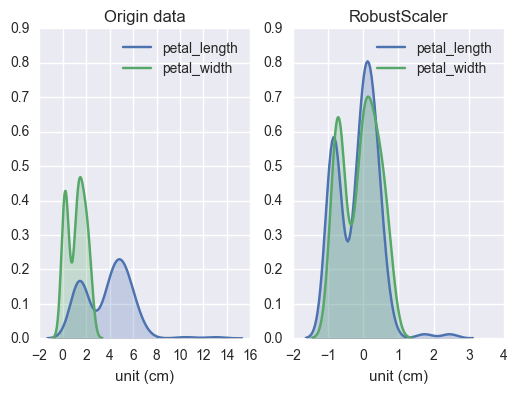

In [294]:
plot_kde(df2, "petal_length", "petal_width", RobustScaler(), "RobustScaler", ymax=0.9)

Yes, RobustScaler is really robust to outliers!<br>
And the last scaler is Normalizer.<br>
Normalizer scales individual samples and make samples have unit norm.<br>
(In other words, Normalizer do normalization on each row, while the other scalers introduced above scale on each column.)<br>
It is commonly used when doing text classification or some other vector space tasks.

In [299]:
samples = [[1.0, 0.0, 1.0, 1.0, 1.0],
           [0.0, 1.0, 1.0, 0.0, 1.0],
           [1.0, 0.0, 0.0, 1.0, 0.0]]
samples = np.array(samples)
scaler = Normalizer()
transformed = scaler.fit_transform(samples)
print("Before transformed:")
print(samples)
print("After transformed:")
print(transformed)

Before transformed:
[[ 1.  0.  1.  1.  1.]
 [ 0.  1.  1.  0.  1.]
 [ 1.  0.  0.  1.  0.]]
After transformed:
[[ 0.5         0.          0.5         0.5         0.5       ]
 [ 0.          0.57735027  0.57735027  0.          0.57735027]
 [ 0.70710678  0.          0.          0.70710678  0.        ]]


---

## Correlation
Correlation refers to the extent to which two variables have **linear relationship** with each other<br>
However, even if two variables x1, x2 have high correlation to each other, it doesn't mean that they have cause-effect relationship.<br>
There might be another variable x3 that cause variable x1, x2's relationship.<br>
Another words, x1, x3 and x2, x3 both have cause-effect relationship, and this relationship cause x1, x2 have correlation to each other.<br>
Nevertheless, x1 and x2 do not nessesarily have cause-effect relationship.<br>
#### How to deal with correlation?
We want to eliminate variables with high correlation to each other.<br>
If we ignore the correlated variables, it will cause collinearity problem.<br>
Normally, we will remove the variable that has higher correlation to the variable that we're going to predict.<br>
numpy provides us function to calculate correlation between two variables.<br>
eg. np.corrcoef(x1, x2)<br>
If you're using pandas, it also provides you a function to calculate the correlation among all features.<br>
eg. df = pd.read_csv("file"); correlation_matrix = df.corr()<br>
To visulize correlation matrix, a good way is to use seaborn heatmap.<br>
eg. sns.heatmap(df.corr())

Correlation
[[ 1.          0.03968367]
 [ 0.03968367  1.        ]]


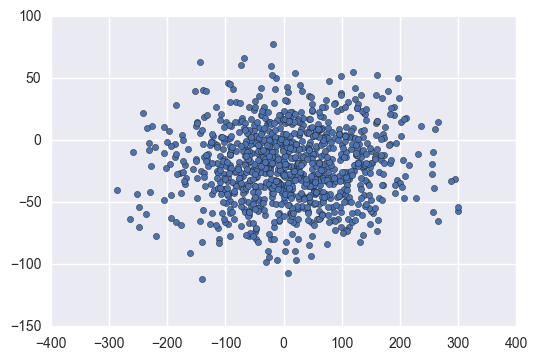

In [88]:
N = 1000
x1 = np.random.normal(10, 100, N)
x2 = np.random.normal(-20, 30, N)
plt.scatter(x1, x2)
print("Correlation")
print(np.corrcoef(x1, x2))

#### Try with real data!
target = Loading bosten dataset from sklearn and list the highest K correlated data.

In [89]:
bosten = datasets.load_boston()
print(bosten.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [90]:
df = pd.DataFrame(bosten.data, columns=bosten.feature_names)
df['Price'] = bosten.target
print("Boston dataset consists of", df.shape[0], "samples and has", df.shape[1], "features.")

Boston dataset consists of 506 samples and has 14 features.


In [91]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


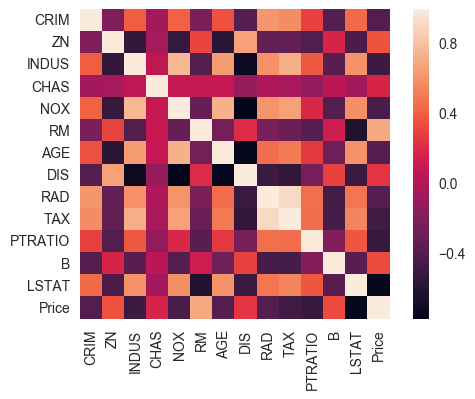

In [92]:
corr = df.corr()
sns.heatmap(corr, square=True)

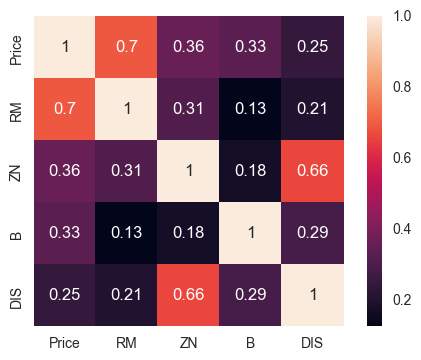

In [93]:
cols = corr.nlargest(5, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, square=True, annot=True, xticklabels=cols.values, yticklabels=cols.values)

---

## Skew data
In real life, however, not all data is normal-distributed.<br>
As a result, we may want to apply data transformation to handle non-normal distributed data.<br>
In this section, we'll going to deal with skew data.<br>

### Right skewness
Right skewness is also known as positive skewness.<br>
To transform right skewness data, we often use log transform.

Skewness: 1.2237235845150698 Kurtosis: 2.202336251376371


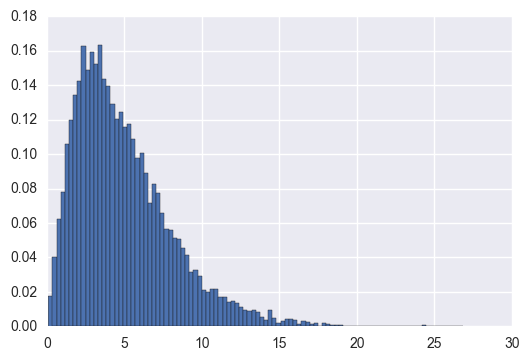

In [79]:
N = 10000
df = 5  # freedom
samples = np.random.chisquare(df, N)
n, bins, patches = plt.hist(samples, normed=1, bins=100)
print("Skewness:", skew(samples), "Kurtosis:", kurtosis(samples))

Skewness: 0.054542587953164266 Kurtosis: -0.41458693011309045
Looks like the log transform performs really well!


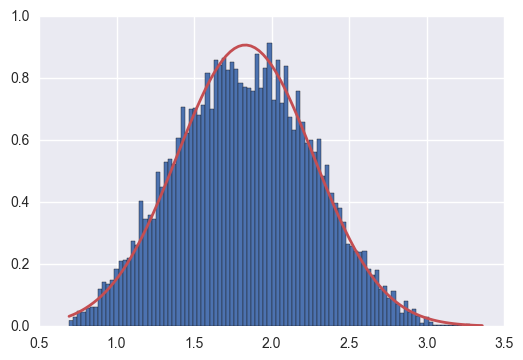

In [80]:
# Since we cannot have negative value in log, we have to shift the data.
log_samples = np.log1p(samples - min(samples) + 1)
n, bins, patches = plt.hist(log_samples, normed=1, bins=100)
mu, sigma = norm.fit(log_samples)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r-', linewidth=2)
print("Skewness:", skew(log_samples), "Kurtosis:", kurtosis(log_samples))
print("Looks like the log transform performs really well!")

### Left skewness
Left skewness is also known as negative skewness.<br>
Use square or cubes or higher powers to deal with it.

Skewness: -0.6166321867744587 Kurtosis: 0.13843980325017036


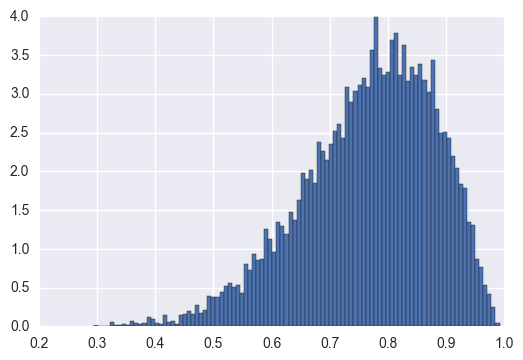

In [137]:
N = 10000
samples = np.random.beta(10, 3, N)
n, bins, patches = plt.hist(samples, normed=1, bins=100)
print("Skewness:", skew(samples), "Kurtosis:", kurtosis(samples))

In [138]:
def plot_left_skew(data, power):
    data = data**power
    n, bins, patches = plt.hist(data, normed=1, bins=100)
    mu, sigma = norm.fit(data)
    y = mlab.normpdf(bins, mu, sigma)
    l = plt.plot(bins, y, 'r-', linewidth=2)
    print("Skewness:", skew(data), "Kurtosis:", kurtosis(data))

Let's handle with left skew data using square and cube transform respectively.

Skewness: -0.23225304338789143 Kurtosis: -0.5067545961255906


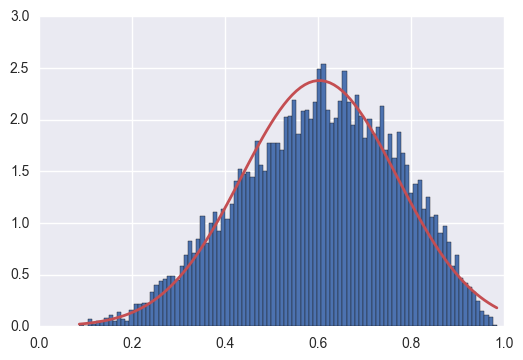

In [139]:
plot_left_skew(samples, 2)

It seems that square works pretty well.<br>
Now let's try how cube works!

Skewness: 0.08037842191490711 Kurtosis: -0.6802390683701915


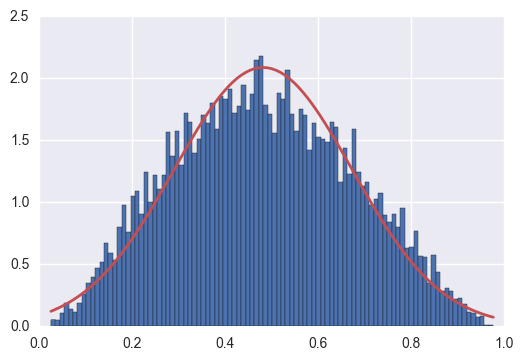

In [141]:
plot_left_skew(samples, 3)

It works even better!
In short, if the data is left skew

---

## Conclusion
This notebook covers several basic statistic concepts as well as data preprocessing methods with examples.<br>
Thanks for reading this notebook. I hope that you can gain some insight from it.:)

---

## Reference
Here are some great reference that really inspired me a lot.
- Data transformation
    - http://fmwww.bc.edu/repec/bocode/t/transint.html
    - This link covers a lot more detailed information on how to do data transformation.
- Udemy course: Data science and machine learning in python.
    - https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/
    - Though this course is not free, it is a pretty good tutorial for those who want to take a look at machine learning in pyhton.
    - This course also covers both basic and a little advanced statistic concepts like T-test and p-value.
- Feature scaling with sklearn
    - http://benalexkeen.com/feature-scaling-with-scikit-learn/
    - This tutorial illustrates four feature scaling methods using sklearn in detail. I highly recommed you to read it.
- Simulation on sampling distribution
    - Take a look at this link if you want to see how central limit theorm works.
    - http://onlinestatbook.com/stat_sim/sampling_dist/index.html